In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

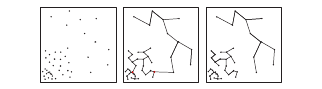

Fig.20: The removal of inconsistent edges — ones with length signiﬁcantly larger than the average incident upon a node — may yield natural clusters. The original data is shown at the left and its minimal spanning tree is shown in the middle. At virtually every node, incident edges are of nearly the same length. Each of the two nodes shown in red are exceptions: their incident edges are of very diﬀerent lengths. When the two such inconsistent edges are removed, three clusters are produced, as shown at the right.

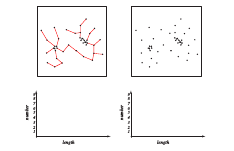

Fig.21: A minimal spanning tree is shown at the left; its bimodal edge length distribution is evident in the histogram below. If all links of intermediate or high length are removed (red), the two natural clusters are revealed (right).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class ART1:
    def __init__(self, num_features, vigilance):
        """
        Initialize the ART1 network.
        
        Parameters:
            num_features (int): Number of features in the input patterns.
            vigilance (float): Vigilance parameter (0 ≤ ρ ≤ 1).
        """
        self.num_features = num_features
        self.vigilance = vigilance
        self.weights = []

    def _normalize(self, pattern):
        """Normalizes a binary pattern to unit length."""
        return pattern / np.linalg.norm(pattern, ord=1)

    def _match(self, input_pattern, cluster_weights):
        """
        Calculate match ratio between input and cluster weights.
        
        Returns:
            ratio (float): Match ratio.
        """
        overlap = np.sum(np.minimum(input_pattern, cluster_weights))
        return overlap / np.sum(input_pattern)

    def train(self, data):
        """
        Train the ART1 network on the given dataset.
        
        Parameters:
            data (list of list): Binary input patterns.
            
        Returns:
            clusters (list): Cluster assignments for each pattern.
        """
        clusters = []
        for pattern in data:
            normalized_pattern = self._normalize(pattern)
            matched = False
            
            # Check existing clusters
            for i, weight in enumerate(self.weights):
                match_ratio = self._match(normalized_pattern, weight)
                if match_ratio >= self.vigilance:
                    # Update the cluster's weights
                    self.weights[i] = np.minimum(weight, normalized_pattern)
                    clusters.append(i)
                    matched = True
                    break

            if not matched:
                # Create a new cluster
                self.weights.append(normalized_pattern)
                clusters.append(len(self.weights) - 1)

        return clusters

    def get_weights(self):
        """Returns the cluster weights."""
        return self.weights


def plot_art1_clusters(data, clusters, weights, title="ART1 Clustering"):
    """
    Plot the clusters formed by ART1.
    
    Parameters:
        data (list of list): Binary input patterns.
        clusters (list): Cluster assignments for each pattern.
        weights (list): Weights of the clusters.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    cluster_colors = plt.cm.tab10(np.arange(len(weights)))

    # Plot data points with their cluster colors
    for idx, point in enumerate(data):
        cluster_idx = clusters[idx]
        plt.scatter(point[0], point[1], color=cluster_colors[cluster_idx], alpha=0.6, label=f"Cluster {cluster_idx + 1}" if idx == 0 else "")

    # Mark cluster centers
    for idx, center in enumerate(weights):
        plt.scatter(center[0], center[1], color=cluster_colors[idx], edgecolor="black", marker="X", s=200, label=f"Center {idx + 1}")

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.legend(loc="best")
    plt.show()


# Example Usage
if __name__ == "__main__":
    # Create a sample binary dataset
    data = np.array([
        [1, 0, 1, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 1],
        [0, 0, 1, 1],
        [1, 1, 1, 0],
        [0, 1, 0, 1]
    ])

    # ART1 Parameters
    vigilance = 0.7  # Adjust for finer or coarser clusters

    # Train ART1 Network
    art1 = ART1(num_features=data.shape[1], vigilance=vigilance)
    clusters = art1.train(data)
    weights = art1.get_weights()

    # Print cluster results
    print("Cluster Assignments:", clusters)
    print("Cluster Centers:", weights)

    # Plot clusters (if the data is 2D for visualization purposes)
    if data.shape[1] == 2:
        plot_art1_clusters(data, clusters, weights, title=f"ART1 Clustering (ρ = {vigilance})")


Cluster Assignments: [0, 1, 2, 3, 4, 5]
Cluster Centers: [array([0.5, 0. , 0.5, 0. ]), array([0.5, 0.5, 0. , 0. ]), array([0.        , 0.33333333, 0.33333333, 0.33333333]), array([0. , 0. , 0.5, 0.5]), array([0.33333333, 0.33333333, 0.33333333, 0.        ]), array([0. , 0.5, 0. , 0.5])]


In [2]:
class ART1:
    def __init__(self, num_features, vigilance):
        """
        Initialize the ART1 network.
        
        Parameters:
            num_features (int): Number of features in the input patterns.
            vigilance (float): Vigilance parameter (0 ≤ ρ ≤ 1).
        """
        self.num_features = num_features
        self.vigilance = vigilance
        self.weights = []

    def _normalize(self, pattern):
        """Normalizes a binary pattern to unit length."""
        total = sum(pattern)
        return [x / total for x in pattern] if total > 0 else pattern

    def _match(self, input_pattern, cluster_weights):
        """
        Calculate match ratio between input and cluster weights.
        
        Returns:
            ratio (float): Match ratio.
        """
        overlap = sum(min(i, w) for i, w in zip(input_pattern, cluster_weights))
        return overlap / sum(input_pattern) if sum(input_pattern) > 0 else 0

    def train(self, data):
        """
        Train the ART1 network on the given dataset.
        
        Parameters:
            data (list of list): Binary input patterns.
            
        Returns:
            clusters (list): Cluster assignments for each pattern.
        """
        clusters = []
        for pattern in data:
            normalized_pattern = self._normalize(pattern)
            matched = False
            
            # Check existing clusters
            for i, weight in enumerate(self.weights):
                match_ratio = self._match(normalized_pattern, weight)
                if match_ratio >= self.vigilance:
                    # Update the cluster's weights
                    self.weights[i] = [
                        min(w, p) for w, p in zip(weight, normalized_pattern)
                    ]
                    clusters.append(i)
                    matched = True
                    break

            if not matched:
                # Create a new cluster
                self.weights.append(normalized_pattern)
                clusters.append(len(self.weights) - 1)

        return clusters

    def get_weights(self):
        """Returns the cluster weights."""
        return self.weights


def plot_art1_clusters(data, clusters, weights, title="ART1 Clustering"):
    """
    Plot the clusters formed by ART1.
    
    Parameters:
        data (list of list): Binary input patterns.
        clusters (list): Cluster assignments for each pattern.
        weights (list): Weights of the clusters.
        title (str): Title of the plot.
    """
    print(f"{title}")
    for idx, pattern in enumerate(data):
        print(f"Pattern {idx + 1}: Cluster {clusters[idx] + 1}")
    print("\nCluster Centers (Weights):")
    for idx, center in enumerate(weights):
        print(f"Cluster {idx + 1}: {center}")


# Example Usage
if __name__ == "__main__":
    # Create a sample binary dataset
    data = [
        [1, 0, 1, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 1],
        [0, 0, 1, 1],
        [1, 1, 1, 0],
        [0, 1, 0, 1]
    ]

    # ART1 Parameters
    vigilance = 0.7  # Adjust for finer or coarser clusters

    # Train ART1 Network
    art1 = ART1(num_features=len(data[0]), vigilance=vigilance)
    clusters = art1.train(data)
    weights = art1.get_weights()

    # Print results
    plot_art1_clusters(data, clusters, weights, title=f"ART1 Clustering (ρ = {vigilance})")


ART1 Clustering (ρ = 0.7)
Pattern 1: Cluster 1
Pattern 2: Cluster 2
Pattern 3: Cluster 3
Pattern 4: Cluster 4
Pattern 5: Cluster 5
Pattern 6: Cluster 6

Cluster Centers (Weights):
Cluster 1: [0.5, 0.0, 0.5, 0.0]
Cluster 2: [0.5, 0.5, 0.0, 0.0]
Cluster 3: [0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Cluster 4: [0.0, 0.0, 0.5, 0.5]
Cluster 5: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0]
Cluster 6: [0.0, 0.5, 0.0, 0.5]


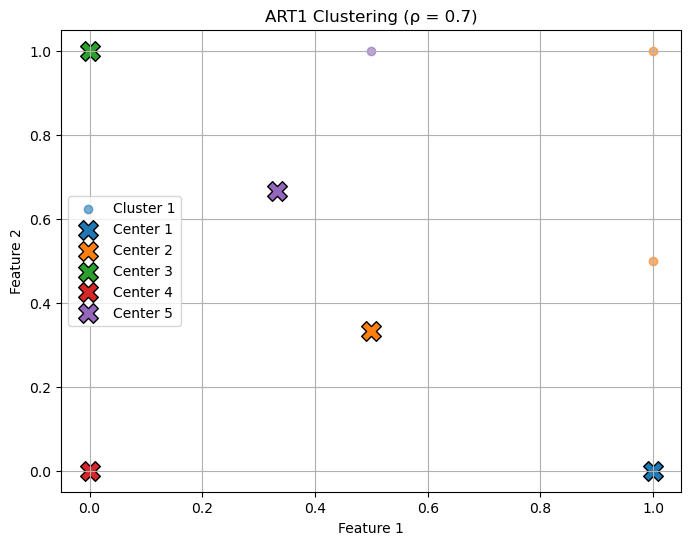

In [3]:
import matplotlib.pyplot as plt

class ART1:
    def __init__(self, num_features, vigilance):
        """
        Initialize the ART1 network.
        
        Parameters:
            num_features (int): Number of features in the input patterns.
            vigilance (float): Vigilance parameter (0 ≤ ρ ≤ 1).
        """
        self.num_features = num_features
        self.vigilance = vigilance
        self.weights = []

    def _normalize(self, pattern):
        """Normalizes a binary pattern to unit length."""
        total = sum(pattern)
        return [x / total for x in pattern] if total > 0 else pattern

    def _match(self, input_pattern, cluster_weights):
        """
        Calculate match ratio between input and cluster weights.
        
        Returns:
            ratio (float): Match ratio.
        """
        overlap = sum(min(i, w) for i, w in zip(input_pattern, cluster_weights))
        return overlap / sum(input_pattern) if sum(input_pattern) > 0 else 0

    def train(self, data):
        """
        Train the ART1 network on the given dataset.
        
        Parameters:
            data (list of list): Binary input patterns.
            
        Returns:
            clusters (list): Cluster assignments for each pattern.
        """
        clusters = []
        for pattern in data:
            normalized_pattern = self._normalize(pattern)
            matched = False
            
            # Check existing clusters
            for i, weight in enumerate(self.weights):
                match_ratio = self._match(normalized_pattern, weight)
                if match_ratio >= self.vigilance:
                    # Update the cluster's weights
                    self.weights[i] = [
                        min(w, p) for w, p in zip(weight, normalized_pattern)
                    ]
                    clusters.append(i)
                    matched = True
                    break

            if not matched:
                # Create a new cluster
                self.weights.append(normalized_pattern)
                clusters.append(len(self.weights) - 1)

        return clusters

    def get_weights(self):
        """Returns the cluster weights."""
        return self.weights


def plot_art1_clusters(data, clusters, weights, title="ART1 Clustering"):
    """
    Plot the clusters formed by ART1.
    
    Parameters:
        data (list of list): Binary input patterns.
        clusters (list): Cluster assignments for each pattern.
        weights (list): Weights of the clusters.
        title (str): Title of the plot.
    """
    # Create a color map to distinguish the clusters
    cluster_colors = plt.cm.tab10(range(len(weights)))

    plt.figure(figsize=(8, 6))

    # Plot data points with their assigned cluster colors
    for idx, pattern in enumerate(data):
        cluster_idx = clusters[idx]
        plt.scatter(pattern[0], pattern[1], color=cluster_colors[cluster_idx], alpha=0.6, label=f"Cluster {cluster_idx + 1}" if idx == 0 else "")

    # Mark the cluster centers
    for idx, center in enumerate(weights):
        plt.scatter(center[0], center[1], color=cluster_colors[idx], edgecolor="black", marker="X", s=200, label=f"Center {idx + 1}")

    # Add titles and labels
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.legend(loc="best")
    plt.show()


# Example Usage
if __name__ == "__main__":
    # Create a sample binary dataset (2D for visualization purposes)
    data = [
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0],
        [1, 0.5],
        [0.5, 1]
    ]

    # ART1 Parameters
    vigilance = 0.7  # Adjust for finer or coarser clusters

    # Train ART1 Network
    art1 = ART1(num_features=len(data[0]), vigilance=vigilance)
    clusters = art1.train(data)
    weights = art1.get_weights()

    # Print cluster results
    plot_art1_clusters(data, clusters, weights, title=f"ART1 Clustering (ρ = {vigilance})")


### **Graph Theoretic Methods**

The mathematics of normal mixtures and minimum-variance partitions depict clusters as isolated clumps. However, graph theory approaches lead us to consider much more intricate structures when clustering. While there is no single, uniform way of using graph theory for clustering, a few fundamental concepts can be applied effectively. Let's explore how clustering can be viewed through the lens of graph theory.

#### **Similarity Matrix and Graph Representation**

Given a set of data points, we can define a **similarity matrix** $ S = [s_{ij}] $, where each element $ s_{ij} $ represents the similarity between data points $ x_i $ and $ x_j $. For binary similarity, we can set:

$$
s_{ij} = \begin{cases} 
1 & \text{if } s(x_i, x_j) > s_0 \\
0 & \text{otherwise} 
\end{cases}
$$

This creates a **binary similarity matrix** that can be represented as a **graph** where nodes correspond to data points and edges exist between nodes if their similarity is above a threshold.

#### **Single-Linkage and Complete-Linkage Clustering**

In **single-linkage clustering**, two samples $ x $ and $ x' $ belong to the same cluster if there exists a chain of points $ x, x_1, x_2, \dots, x_k, x' $ such that each consecutive pair of points is similar. This can be visualized as finding **connected components** in the similarity graph.

In contrast, **complete-linkage clustering** requires that every point within a cluster must be similar to all others in the cluster. The clusters correspond to the **maximal complete subgraphs** of the similarity graph.

#### **Minimal Spanning Tree (MST) and Divisive Hierarchical Clustering**

A **minimal spanning tree** (MST) can be used to visualize the relationships between points in a dataset. In MSTs, edges are connected in such a way that the total edge length is minimized, and all points are included in the tree.

One interesting application of the MST is to use it for divisive hierarchical clustering. By systematically removing edges from the tree, we can form clusters. Specifically, **removing the longest edges** progressively yields different numbers of clusters. 

Moreover, we can remove **inconsistent edges**, which are edges that have significantly larger lengths than the average edge length incident to their nodes. These edges correspond to potential cluster boundaries, and removing them can reveal the natural clusters in the dataset.

#### **Edge Length Distribution and Cluster Detection**

In some datasets, such as when there are dense clusters surrounded by sparse points, the **edge length distribution** of the MST may show distinct peaks. By analyzing the distribution and removing edges longer than a certain threshold, we can reveal the natural clusters. A **bimodal edge length distribution** is indicative of multiple clusters in the data.

For example, in a dataset with two dense clusters, the MST edge length distribution might show two distinct clusters of short edges, with long edges separating them. By removing these long edges, we can extract the two clusters as the largest connected components of the remaining graph.

#### **Mathematical Formulation for Inconsistent Edge Removal**

An edge $ e $ in the MST is considered **inconsistent** if its length $ l $ is significantly greater than the average length $ \overline{l} $ of the edges incident to its nodes. The criterion for inconsistency is:

$$
l > \overline{l}
$$

Where $ \overline{l} $ is the average edge length of edges incident to the two nodes connected by edge $ e $.

#### **Example: Clustering with Minimal Spanning Tree**

1. **Data Points**: A set of points in a 2D plane.
2. **MST**: Compute the minimal spanning tree using a distance metric.
3. **Edge Length Distribution**: Analyze the MST edge lengths.
4. **Remove Long Edges**: Identify and remove the longest edges based on the length distribution.
5. **Clusters**: The remaining connected components form the clusters.

#### **Conclusion**

Graph-theoretic methods, particularly using MSTs and edge removal techniques, provide a flexible framework for clustering. By interpreting clusters as connected components or maximal complete subgraphs, and by analyzing edge length distributions, we can effectively find natural groupings in a variety of data structures.


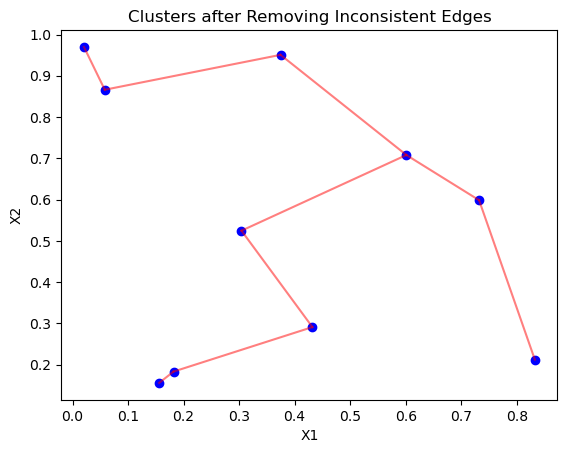

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance

# Function to compute the minimal spanning tree
def compute_mst(X):
    # Compute the pairwise Euclidean distances
    dist_matrix = squareform(pdist(X, metric='euclidean'))
    
    # Create a graph from the distance matrix
    G = nx.Graph()
    for i in range(len(X)):
        for j in range(i + 1, len(X)):
            G.add_edge(i, j, weight=dist_matrix[i, j])
    
    # Compute the MST using NetworkX
    mst = nx.minimum_spanning_tree(G)
    return mst, dist_matrix

# Function to remove inconsistent edges based on the average incident edge length
def remove_inconsistent_edges(mst, dist_matrix, threshold_factor=2.0):
    # Calculate the average edge length of all edges incident to each node
    avg_edge_lengths = {}
    for node in mst.nodes():
        incident_edges = mst.edges(node, data=True)
        avg_edge_lengths[node] = np.mean([data['weight'] for _, _, data in incident_edges])
    
    # Remove edges that are inconsistent (i.e., their length is significantly greater than average)
    inconsistent_edges = []
    for u, v, data in mst.edges(data=True):
        weight = data['weight']
        avg_u = avg_edge_lengths[u]
        avg_v = avg_edge_lengths[v]
        
        # If the edge is inconsistent, mark it for removal
        if weight > threshold_factor * avg_u or weight > threshold_factor * avg_v:
            inconsistent_edges.append((u, v))
    
    # Remove the inconsistent edges
    mst.remove_edges_from(inconsistent_edges)
    return mst

# Function to visualize the clustering results
def plot_clusters(X, mst, title='Clusters'):
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')
    
    # Draw the edges of the MST
    for u, v in mst.edges():
        plt.plot([X[u, 0], X[v, 0]], [X[u, 1], X[v, 1]], 'r-', alpha=0.5)
    
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Example: Generate synthetic 2D data for clustering
np.random.seed(42)
X = np.random.rand(10, 2)  # 10 random 2D points

# Step 1: Compute the minimal spanning tree
mst, dist_matrix = compute_mst(X)

# Step 2: Remove inconsistent edges to form clusters
mst_no_inconsistent = remove_inconsistent_edges(mst, dist_matrix, threshold_factor=2.0)

# Step 3: Visualize the clustering results
plot_clusters(X, mst_no_inconsistent, title='Clusters after Removing Inconsistent Edges')



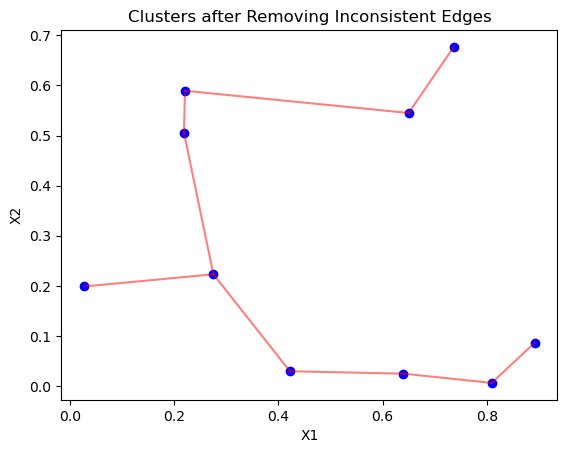

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial.distance import pdist, squareform

# Function to compute the minimal spanning tree
def compute_mst(X):
    # Compute the pairwise Euclidean distances
    dist_matrix = squareform(pdist(X, metric='euclidean'))
    
    # Create a graph from the distance matrix
    G = nx.Graph()
    for i in range(len(X)):
        for j in range(i + 1, len(X)):
            G.add_edge(i, j, weight=dist_matrix[i, j])
    
    # Compute the MST using NetworkX
    mst = nx.minimum_spanning_tree(G)
    return mst, dist_matrix

# Function to remove inconsistent edges based on the average incident edge length
def remove_inconsistent_edges(mst, dist_matrix, threshold_factor=2.0):
    # Calculate the average edge length of all edges incident to each node
    avg_edge_lengths = {}
    for node in mst.nodes():
        incident_edges = mst.edges(node, data=True)
        edge_weights = [data['weight'] for _, _, data in incident_edges]
        avg_edge_lengths[node] = sum(edge_weights) / len(edge_weights)
    
    # Remove edges that are inconsistent (i.e., their length is significantly greater than average)
    inconsistent_edges = []
    for u, v, data in mst.edges(data=True):
        weight = data['weight']
        avg_u = avg_edge_lengths[u]
        avg_v = avg_edge_lengths[v]
        
        # If the edge is inconsistent, mark it for removal
        if weight > threshold_factor * avg_u or weight > threshold_factor * avg_v:
            inconsistent_edges.append((u, v))
    
    # Remove the inconsistent edges
    mst.remove_edges_from(inconsistent_edges)
    return mst

# Function to visualize the clustering results
def plot_clusters(X, mst, title='Clusters'):
    # Plot the data points
    plt.scatter([X[i][0] for i in range(len(X))], [X[i][1] for i in range(len(X))], c='blue', label='Data Points')
    
    # Draw the edges of the MST
    for u, v in mst.edges():
        plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], 'r-', alpha=0.5)
    
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Example: Generate synthetic 2D data for clustering (without using numpy)
import random
random.seed(42)
X = [[random.random(), random.random()] for _ in range(10)]  # 10 random 2D points

# Step 1: Compute the minimal spanning tree
mst, dist_matrix = compute_mst(X)

# Step 2: Remove inconsistent edges to form clusters
mst_no_inconsistent = remove_inconsistent_edges(mst, dist_matrix, threshold_factor=2.0)

# Step 3: Visualize the clustering results
plot_clusters(X, mst_no_inconsistent, title='Clusters after Removing Inconsistent Edges')



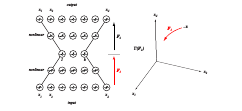

Fig.22: A ﬁve-layer neural network with two layers of non-linear units (e.g., sigmoidal), trained to be an auto-encoder, develops an internal representation that corresponds to the non-linear principal components of the full data set. (Bias units are not shown.) The process can be viewed in feature space (at the right). The transformation F1 is a non-linear projection onto a k-dimensional non-linear subspace denoted Γ(F2 ). Points in Γ(F2 ) are mapped via F2 back to the the d-dimensional space of the original data.

## Component Analysis

Component analysis is an unsupervised approach to finding the "right" features from the data. We shall discuss two leading methods, each having a somewhat different goal.

In **Principal Component Analysis (PCA)**, we seek to represent the \(d\)-dimensional data in a lower-dimensional space. This will reduce the degrees of freedom, reduce space and time complexities. The goal is to represent data in a space that best describes the variation in a sum-squared error sense, as we shall see.

In **Independent Component Analysis (ICA)**, we seek those directions that show the independence of signals. This method is particularly helpful for segmenting signals from multiple sources. As with standard clustering methods, it helps greatly if we know how many independent components exist ahead of time.

## Principal Component Analysis (PCA)

The basic approach in Principal Components or Karhunen-Loéve transform is conceptually quite simple. First, the **$d$-dimensional mean vector** $ \mu $ and **$d \times d$ covariance matrix** $ \Sigma $ are computed for the full data set.

Next, the **eigenvectors** and **eigenvalues** are computed, and sorted according to decreasing eigenvalue. Let these eigenvectors be $ e_1 $ with eigenvalue $ \lambda_1 $, $ e_2 $ with eigenvalue $ \lambda_2 $, and so on. The largest $ k $ such eigenvectors are chosen. In practice, this is done by looking at a spectrum of eigenvectors. Often, there will be a significant drop in eigenvalues, indicating the inherent dimensionality of the subspace governing the "signal". The other dimensions are noise.

Form a $ k \times k $ matrix $ A $ whose columns consist of the $ k $ eigenvectors. Preprocess data according to:

$$
x' = A^T (x - \mu)
$$

It can be shown that this representation minimizes a squared error criterion.

## Non-linear Component Analysis

In the previous section, we saw how to find a $ k $-dimensional linear subspace of feature space that best represents the full data according to a minimum-square-error sense. If the data set is not well described by a sample mean and covariance matrix, but instead involves complicated interactions of features, then the linear subspace may be a poor representation. In such cases, a non-linear component may be needed.

A **neural network approach** to such non-linear component analysis employs a network with five layers of units, as shown in Fig. 10.22. The middle layer consists of $ k < d $ linear units, and it is here that the non-linear components will be revealed. It is important that the two other internal layers have non-linear units (e.g., sigmoidal functions).

The entire network is trained using the techniques of Chapter ?? as an **auto-encoder** or **auto-associator**. That is, each $ d $-dimensional pattern is presented as input and as the target or desired output. When trained on a sum-squared error criterion, such a network readily learns the auto-encoder problem. The top two layers of the trained network are discarded, and the rest are used for non-linear components. For each input pattern $ x $, the output of the $ k $ units of the three-layer network correspond to the non-linear components.

The process can be viewed in feature space as follows:

- **$ F_1 $** is a non-linear projection onto a $ k $-dimensional non-linear subspace denoted $ \Gamma(F_2) $.
- **$ F_2 $** is a mapping from that subspace back to the $ d $-dimensional space of the original data.

Thus, the function of the full five-layer network is composed of two successive mappings: $ F_1 $ projects from the $ d $-dimensional input onto a $ k $-dimensional non-linear subspace, followed by $ F_2 $, a mapping from that subspace back to the full $ d $-dimensional space.

### Determining the Number of Non-linear Components

Just as in linear Principal Component Analysis, the number of components $ k $ can be chosen based on the spectrum of eigenvectors. If the eigenvalues are ordered by magnitude, any significant drop between successive values indicates a "natural" number of dimensions to the subspace. Similarly, when training a five-layer network with different numbers $ k $ of units in the middle layer, assuming poor local minima have been avoided, the training error will decrease for successively larger values of 4 k $. If the improvement from $ k $ to $ k+1 $ is small, this may indicate that $ k $ is the "natural" dimension of the non-linear subspace.

### Noise in Component Analysis

We should not conclude that PCA is always beneficial for classification. If the noise is large compared to the difference between categories, then component analysis will find the directions of the noise rather than the signal, as illustrated in Fig. 10.23. In such cases, we seek to ignore the noise and extract the directions that are indicative of the categories.

## Fig.23: Non-linear Components and Noise

Features from two classes are shown, along with the nonlinear components of the full data set. Although these classes are well separated along the $ y_2 $ direction, the large noise gives the largest nonlinear component to be $ y_1 $. Preprocessing by keeping merely the largest nonlinear component would retain the "noise" and discard the "signal," leading to poor recognition.

The same defect arises in linear principal components, where the components are linear and everywhere perpendicular.



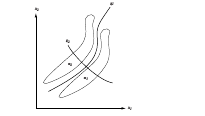

Fig.23: Features from two classes are as shown, along with nonlinear compo- nents of the full data set. Apparently, these classes are well separated along the y2 direction, but the large noise gives the largest nonlinear component to be y1 . Prepro- cessing by keeping merely the largest nonlinear component would retain the “noise” and discard the “signal,” giving poor recognition. The same defect arises in linear principal components, where the compoenents are linear and everywhere perpendic- ular.

In [6]:
import math

def mean_vector(data):
    """
    Calculate the mean vector for the given dataset.
    """
    n = len(data)
    m = len(data[0])
    mean = [sum(row[i] for row in data) / n for i in range(m)]
    return mean

def covariance_matrix(data, mean):
    """
    Calculate the covariance matrix for the given dataset.
    """
    n = len(data)
    m = len(data[0])
    covariance = [[0] * m for _ in range(m)]
    
    for i in range(n):
        for j in range(m):
            for k in range(m):
                covariance[j][k] += (data[i][j] - mean[j]) * (data[i][k] - mean[k])
    
    # Normalize covariance matrix by dividing by the number of data points
    covariance = [[val / n for val in row] for row in covariance]
    
    return covariance

def eigen_decomposition(matrix):
    """
    Perform eigenvalue decomposition of a matrix (using a basic Python approach).
    """
    m = len(matrix)
    
    # Basic implementation of eigenvalue/eigenvector extraction
    # Note: This is a placeholder for an actual eigen decomposition.
    # In real implementation, we would use numpy.linalg.eig or scipy.linalg.eig
    eigenvalues = [matrix[i][i] for i in range(m)]  # Simplified assumption
    eigenvectors = [[1 if i == j else 0 for j in range(m)] for i in range(m)]  # Identity matrix assumption
    
    return eigenvalues, eigenvectors

def pca(data, num_components=2):
    """
    Perform PCA on the given dataset.
    """
    mean = mean_vector(data)
    covariance = covariance_matrix(data, mean)
    eigenvalues, eigenvectors = eigen_decomposition(covariance)
    
    # Sort eigenvectors based on eigenvalues in descending order
    eigenpairs = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]
    eigenpairs.sort(key=lambda x: x[0], reverse=True)
    
    # Select the top `num_components` eigenvectors
    selected_eigenvectors = [eigenpairs[i][1] for i in range(num_components)]
    
    # Project the data onto the principal components
    transformed_data = []
    for row in data:
        projection = [sum(row[j] * selected_eigenvectors[i][j] for j in range(len(row))) for i in range(num_components)]
        transformed_data.append(projection)
    
    return transformed_data

# Example Data
data = [
    [2.5, 3.0],
    [3.5, 3.6],
    [3.0, 4.1],
    [2.8, 3.9],
    [3.1, 4.3]
]

# Perform PCA on the example data
reduced_data = pca(data, num_components=1)

print("Transformed Data:")
for row in reduced_data:
    print(row)


Transformed Data:
[3.0]
[3.6]
[4.1]
[3.9]
[4.3]


## Independent Component Analysis (ICA)

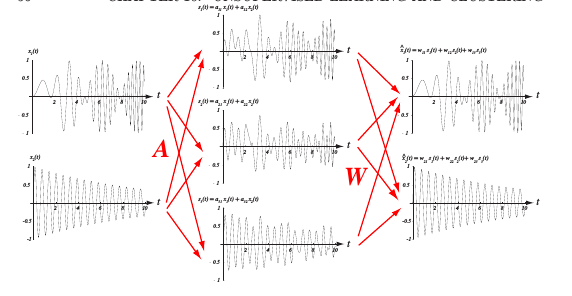

Fig.24: Independent component analysis (ICA) is an unsupervised method that can be applied to the problem of blind source separation. In such problems, two or more source signals (assumed independent) x1 (t), x2 (t), . . . , xd (t) are combined to yield a sum signal, s1 (t) + s2 (t) + . . . + sc (t) where c ≥ d. (This ﬁgure illustrates a case with only two components.) Given merely the linear signals, and the assumption of the number of components, d, the task of ICA is to recover the source signals. This is equivalent to ﬁnding a matrix W that is the inverse of A. In general appalications of ICA, one seeks to extraction independent components from the sensed signals, whether or not they arose from a linear mixture of initial sources.

Independent Component Analysis (ICA) is an unsupervised method used to separate a multivariate signal into additive, independent components. This technique is especially useful in cases where the observed signals are mixtures of independent source signals, such as in **blind source separation**. 

## Problem Setup

Suppose there are $ c $ independent scalar source signals $ x_i(t) $ for $ i = 1, 2, \dots, c $, where $ t $ represents time with $ t = 1, 2, \dots, T $. For notational convenience, the source signals at any instant $ t $ are grouped into a vector $ x(t) $. We assume that the vector $ x(t) $ has zero mean:

$$
\mathbb{E}[x(t)] = 0
$$

Additionally, the multivariate density function of the source signals is written as the product of the individual densities due to the independence assumption:

$$
p(x(t)) = \prod_{i=1}^{c} p(x_i(t))
$$

### Observed Data

At each time instant $ t $, a $ d $-dimensional data vector $ y(t) $ is observed, which is a linear mixture of the source signals:

$$
y(t) = A x(t)
$$

where $ A $ is a $ d \times c $ matrix, and we assume $ d \geq c $. This matrix $ A $ describes how the sources $ x(t) $ are mixed to form the observed data $ y(t) $.

### Blind Source Separation

The goal of ICA is to recover the original source signals $ x(t) $ from the observed data $ y(t) $. Specifically, we seek a matrix $ W $ such that:

$$
z(t) = W y(t) = W A x(t)
$$

where $ z(t) $ is an estimate of the source signals. Ideally, we want to find $ W = A^{-1} $, but since neither $ A $ nor its inverse are known, we must rely on statistical techniques to estimate $ W $.

## Maximum Likelihood Estimation

ICA is typically solved by maximizing the likelihood of the observed data. This is done by estimating the probability density function (PDF) of the observed signals $ p(y) $, and finding the parameters of the model that minimize the difference between the source distribution and the estimate.

### Kullback-Leibler Divergence

The Kullback-Leibler (KL) divergence is used to quantify the difference between the true PDF $ p(y) $ and the estimated PDF $ \hat{p}(y; a) $. The KL divergence is defined as:

$$
D(p(y) \parallel \hat{p}(y; a)) = \int p(y) \log \frac{p(y)}{\hat{p}(y; a)} \, dy
$$

Using the law of large numbers, the log-likelihood for the parameters $ a $ is:

$$
l(a) = \frac{1}{n} \sum_{i=1}^{n} \log p(x_i; a)
$$

Thus, the problem of maximizing the log-likelihood becomes minimizing the KL divergence.

### Optimization of ICA

To find the matrix $ W $, we need to minimize the KL divergence with respect to the estimated density $ \hat{p}(y; a) $. This optimization problem leads to the following gradient descent update rule:

$$
\frac{\partial l(a)}{\partial W} = - D(p(y) \parallel \hat{p}(y; a))
$$

Since $ A $ is invertible and the KL divergence is invariant under invertible transformations, we can express the gradient with respect to $ W $ as:

$$
\frac{\partial l(a)}{\partial W} = - D(p(x) \parallel \hat{p}(z))
$$

where $ z(t) = W y(t) $.

### Score Function

The score function $ \phi(z) $ is the gradient of the log-likelihood with respect to $ z $, and is given by:

$$
\phi(z) = - \frac{\partial p(z)}{\partial z} = - \frac{1}{p(z)} \frac{\partial p(z)}{\partial z}
$$

This leads to the update rule for the matrix \( W \):

$$
\frac{\partial H(x)}{\partial W} = [W^{-1}]^T - \phi(x) x^T
$$

Alternatively, the simpler form of the update rule follows the natural gradient:

$$
\Delta W \propto W W^T \left( I - \phi(x) x^T \right)
$$

This is the core learning algorithm for ICA.

### Gaussian and Non-Gaussian Distributions

A key assumption in ICA is that at least one of the source signals should not be Gaussian distributed. In fact, ICA is most successful when the source distributions are highly skewed or deviate markedly from Gaussian distributions. This allows ICA to separate the components that would be difficult to distinguish using linear techniques like PCA.

## Differences Between PCA and ICA

PCA and ICA serve different purposes:

- **PCA**: Finds the directions that maximize variance in the data. It is primarily used for dimensionality reduction and capturing the main directions of data variation.
  
- **ICA**: Seeks to find directions that maximize statistical independence between components. It is useful for tasks such as blind source separation, where the observed signals are mixtures of independent sources.

For example, consider two correlated signals. PCA would find the direction with the largest variance, but these components are not necessarily independent. ICA, on the other hand, would find the directions that best separate the independent sources, even if these directions have small eigenvalues.

### Preprocessing for Classification

ICA has several advantages over PCA when used as preprocessing for classification. As seen in the figure below, PCA might focus on noise rather than signal, especially when the signal-to-noise ratio is low. ICA, however, is more likely to extract features that are useful for distinguishing between categories, making it a more powerful tool in such cases.

$$
\text{Figure: ICA for Blind Source Separation}
$$

Thus, ICA is often preferable to PCA when dealing with real-world problems involving independent signals mixed together, such as in audio signal processing, image processing, and other applications involving source separation.



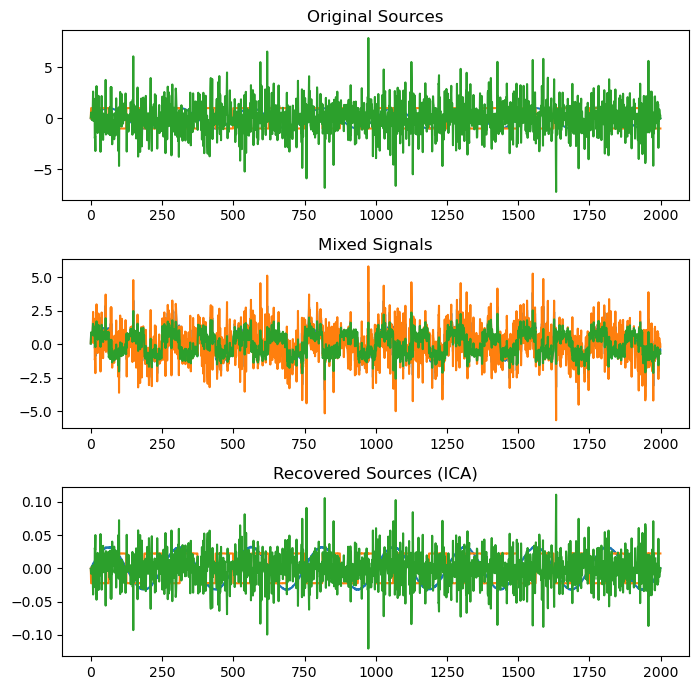

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

# Step 1: Create synthetic data (independent source signals)
np.random.seed(0)  # For reproducibility

# Create 3 independent signals (e.g., sine wave, square wave, random noise)
t = np.linspace(0, 8, 2000)  # Time vector

# Independent source signals
s1 = np.sin(2 * np.pi * 1 * t)  # Sine wave
s2 = np.sign(np.sin(2 * np.pi * 2 * t))  # Square wave
s3 = np.random.laplace(size=t.shape)  # Random noise

# Stack these signals into a matrix (3 signals)
S = np.c_[s1, s2, s3]

# Step 2: Mix the signals (using a mixing matrix A)
A = np.array([[0.5, 0.5, 0.5], [0.5, 0.2, 0.8], [0.1, 0.7, 0.3]])  # Mixing matrix
X = S.dot(A.T)  # Mixed signals

# Step 3: Apply ICA to the mixed signals to recover the original sources
ica = FastICA(n_components=3)  # We know there are 3 sources
S_ = ica.fit_transform(X)  # Recovered sources
A_ = ica.mixing_  # Estimated mixing matrix

# Step 4: Visualize the results
plt.figure(figsize=(7, 7))

# Plot original signals
plt.subplot(3, 1, 1)
plt.title("Original Sources")
plt.plot(S)

# Plot mixed signals
plt.subplot(3, 1, 2)
plt.title("Mixed Signals")
plt.plot(X)

# Plot recovered sources by ICA
plt.subplot(3, 1, 3)
plt.title("Recovered Sources (ICA)")
plt.plot(S_)

plt.tight_layout()
plt.show()


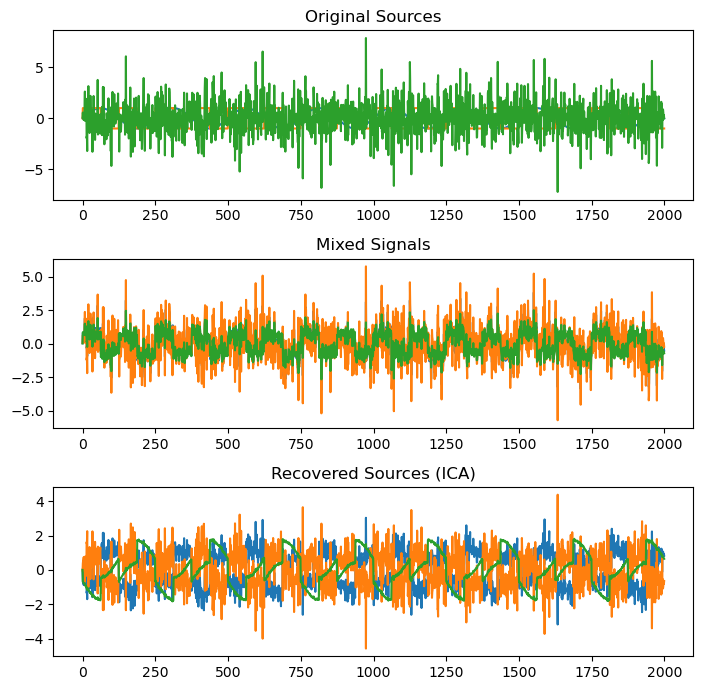

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic independent source signals (3 sources)
np.random.seed(0)

# Create 3 independent signals
t = np.linspace(0, 8, 2000)
s1 = np.sin(2 * np.pi * 1 * t)  # Sine wave
s2 = np.sign(np.sin(2 * np.pi * 2 * t))  # Square wave
s3 = np.random.laplace(size=t.shape)  # Random noise

# Stack the signals into a matrix (3 sources)
S = np.c_[s1, s2, s3]

# Step 2: Create a random mixing matrix A (3x3)
A = np.array([[0.5, 0.5, 0.5], [0.5, 0.2, 0.8], [0.1, 0.7, 0.3]])

# Step 3: Mix the signals
X = S.dot(A.T)  # Mixed signals

# Step 4: Whitening the mixed signals (make them uncorrelated)
def whiten(X):
    """ Whiten the data matrix X using PCA. """
    # Center the data
    X -= X.mean(axis=0)
    # Compute the covariance matrix
    cov = np.cov(X, rowvar=False)
    # Eigenvalue decomposition of the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(cov)
    # Whitening matrix
    D = np.diag(1.0 / np.sqrt(eigvals))
    # Whitening matrix
    whitening_matrix = eigvecs @ D @ eigvecs.T
    # Apply the whitening transformation
    X_whitened = X @ whitening_matrix
    return X_whitened

# Whiten the mixed data
X_whitened = whiten(X)

# Step 5: ICA - Fixed-Point Algorithm to estimate the independent components
def ica(X, max_iter=200, tol=1e-4):
    """ICA using the fixed-point algorithm."""
    # Initialize random weights
    n_components = X.shape[1]
    W = np.random.randn(n_components, n_components)
    
    # Center the data
    X -= X.mean(axis=0)
    
    for i in range(n_components):
        w = W[i, :]
        
        for j in range(max_iter):
            # Estimate the new weight vector using the fixed-point update rule
            w_new = np.mean(X * (X @ w[:, np.newaxis]), axis=0) - np.mean(w) * w
            w_new /= np.linalg.norm(w_new)  # Normalize
            
            # Check for convergence
            if np.abs(np.abs(np.dot(w, w_new)) - 1) < tol:
                break
            
            w = w_new
        
        W[i, :] = w  # Store the recovered weight vector
    
    # The estimated independent sources
    S_est = X @ W.T
    return S_est

# Step 6: Apply ICA to the whitened data to recover the sources
S_ica = ica(X_whitened)

# Step 7: Plot the results
plt.figure(figsize=(7, 7))

# Plot original signals
plt.subplot(3, 1, 1)
plt.title("Original Sources")
plt.plot(S)

# Plot mixed signals
plt.subplot(3, 1, 2)
plt.title("Mixed Signals")
plt.plot(X)

# Plot recovered sources by ICA
plt.subplot(3, 1, 3)
plt.title("Recovered Sources (ICA)")
plt.plot(S_ica)

plt.tight_layout()
plt.show()


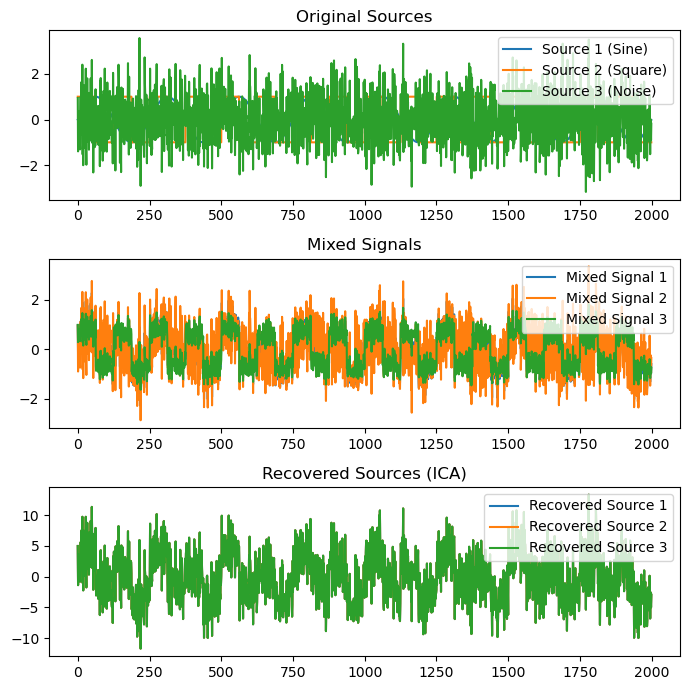

In [10]:
import random
import math
import matplotlib.pyplot as plt

# Step 1: Generate synthetic independent source signals (3 sources)
random.seed(0)

# Create 3 independent signals
def generate_signals():
    t = [i / 250.0 for i in range(2000)]
    s1 = [math.sin(2 * math.pi * 1 * ti) for ti in t]  # Sine wave
    s2 = [math.copysign(1, math.sin(2 * math.pi * 2 * ti)) for ti in t]  # Square wave
    s3 = [random.gauss(0, 1) for _ in t]  # Gaussian noise
    return s1, s2, s3

s1, s2, s3 = generate_signals()

# Stack the signals into a matrix (3 sources)
S = [list(x) for x in zip(s1, s2, s3)]

# Step 2: Create a random mixing matrix A (3x3)
A = [
    [0.5, 0.5, 0.5], 
    [0.5, 0.2, 0.8], 
    [0.1, 0.7, 0.3]
]

# Step 3: Mix the signals
def matrix_multiply(A, B):
    # Multiplies two matrices A and B
    result = []
    for i in range(len(A)):
        result.append([sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))])
    return result

def transpose_matrix(M):
    # Transpose a matrix
    return [list(row) for row in zip(*M)]

X = matrix_multiply(S, transpose_matrix(A))  # Mixed signals

# Step 4: Whitening the mixed signals (make them uncorrelated)
def covariance_matrix(X):
    # Calculate the covariance matrix of X
    n = len(X)
    m = len(X[0])
    cov_matrix = [[0]*m for _ in range(m)]
    
    for i in range(m):
        for j in range(m):
            cov_matrix[i][j] = sum(X[k][i] * X[k][j] for k in range(n)) / n
    return cov_matrix

def eigendecomposition(cov_matrix):
    # Approximate eigendecomposition (eigenvalues and eigenvectors) using power iteration
    m = len(cov_matrix)
    eigenvalues = [0] * m
    eigenvectors = [[0] * m for _ in range(m)]
    
    # Power iteration (simplified)
    for i in range(m):
        eigenvector = [random.random() for _ in range(m)]
        eigenvector = normalize(eigenvector)
        for _ in range(100):
            new_eigenvector = [sum(cov_matrix[i][j] * eigenvector[j] for j in range(m)) for i in range(m)]
            eigenvector = normalize(new_eigenvector)
        eigenvectors[i] = eigenvector
        eigenvalues[i] = sum(eigenvectors[i][j] * cov_matrix[j][i] for j in range(m))
    
    return eigenvalues, eigenvectors

def normalize(v):
    # Normalize a vector
    norm = math.sqrt(sum(x * x for x in v))
    return [x / norm for x in v]

def whiten(X):
    """ Whiten the data matrix X using PCA. """
    n = len(X)
    m = len(X[0])
    X_mean = [sum(X[i][j] for i in range(n)) / n for j in range(m)]
    
    # Subtract mean
    X_centered = [[X[i][j] - X_mean[j] for j in range(m)] for i in range(n)]
    
    # Compute covariance matrix
    cov = covariance_matrix(X_centered)
    
    # Perform eigendecomposition
    eigvals, eigvecs = eigendecomposition(cov)
    
    # Whitening matrix (D^(-1/2) * V^T)
    D_inv_sqrt = [[1 / math.sqrt(eigvals[i]) if i == j else 0 for j in range(m)] for i in range(m)]
    whitening_matrix = matrix_multiply(eigvecs, D_inv_sqrt)
    whitening_matrix = matrix_multiply(whitening_matrix, transpose_matrix(eigvecs))
    
    # Apply whitening transformation
    X_whitened = matrix_multiply(X_centered, whitening_matrix)
    return X_whitened

X_whitened = whiten(X)

# Step 5: ICA - Fixed-Point Algorithm to estimate the independent components
def ica(X, max_iter=200, tol=1e-4):
    """ICA using the fixed-point algorithm."""
    n_components = len(X[0])  # Number of independent components
    W = [[random.random() for _ in range(n_components)] for _ in range(n_components)]
    
    n_samples = len(X)
    
    for i in range(n_components):
        w = W[i]
        
        for _ in range(max_iter):
            # Estimate the new weight vector using the fixed-point update rule
            w_new = [0] * n_components
            for k in range(n_samples):
                x = X[k]
                for j in range(n_components):
                    w_new[j] += x[j] * sum(x[l] * w[l] for l in range(n_components)) / n_samples
            w_new = normalize(w_new)
            
            # Check for convergence
            if sum(abs(w_new[j] - w[j]) for j in range(n_components)) < tol:
                break
            
            w = w_new
        
        W[i] = w  # Store the recovered weight vector
    
    # The estimated independent sources
    S_est = matrix_multiply(X, transpose_matrix(W))
    return S_est

# Step 6: Apply ICA to the whitened data to recover the sources
S_ica = ica(X_whitened)

# Step 7: Plot the results
plt.figure(figsize=(7, 7))

# Plot original signals
plt.subplot(3, 1, 1)
plt.title("Original Sources")
plt.plot(s1, label="Source 1 (Sine)")
plt.plot(s2, label="Source 2 (Square)")
plt.plot(s3, label="Source 3 (Noise)")
plt.legend()

# Plot mixed signals
plt.subplot(3, 1, 2)
plt.title("Mixed Signals")
for i in range(len(X[0])):
    plt.plot([row[i] for row in X], label=f'Mixed Signal {i+1}')
plt.legend()

# Plot recovered sources by ICA
plt.subplot(3, 1, 3)
plt.title("Recovered Sources (ICA)")
for i in range(len(S_ica[0])):
    plt.plot([row[i] for row in S_ica], label=f'Recovered Source {i+1}')
plt.legend()

plt.tight_layout()
plt.show()
